In [ ]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy as sp
import math
import random
from scipy import optimize, signal
from lmfit import Model, models
from numpy import exp, linspace, random
from lmfit.models import GaussianModel,ConstantModel
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
from uncertainties import ufloat
from uncertainties.umath import * , sqrt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from numpy import diff
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

tiemposMaxAr = {}
intensidadesMaxAr = {}
maximosMaxAr = {}
for i in range(1,41):
    if i in [13,18,33,37,38,39]:
        pass
    elif i < 10:
        tiemposMaxAr[i] = np.genfromtxt(f"./datosdepositos/2AZ2/2AZ200{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidadesMaxAr[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ2/2AZ200{i}_Ch1.txt", skip_header=2635,usecols=1))
    else:
        tiemposMaxAr[i] = np.genfromtxt(f"./datosdepositos/2AZ2/2AZ20{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidadesMaxAr[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ2/2AZ20{i}_Ch1.txt", skip_header=2635,usecols=1))
        
tiemposMaxMs = {}
intensidadesMaxMs = {}
maximosMaxMs = {}
for i in range(1,40):
    if i in [15,21,33]:
        pass
    elif i < 10:
        tiemposMaxMs[i] = np.genfromtxt(f"./datosdepositos/2AZ3/2AZ300{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidadesMaxMs[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ3/2AZ300{i}_Ch1.txt", skip_header=2635,usecols=1))
    else:
        tiemposMaxMs[i] = np.genfromtxt(f"./datosdepositos/2AZ3/2AZ30{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidadesMaxMs[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ3/2AZ30{i}_Ch1.txt", skip_header=2635,usecols=1))
        
tiemposMaxVac = {}
intensidadesMaxVac = {}
maximosMaxVac = {}
for i in range(0,32):
    if i < 10:
        tiemposMaxVac[i] = np.genfromtxt(f"./txtconvertidos/310119MaxE00{i}_Ch1.txt", skip_header=1635, usecols=0)*1e6
        intensidadesMaxVac[i] = abs(np.genfromtxt(f"./txtconvertidos/310119MaxE00{i}_Ch1.txt", skip_header=1635,usecols=1))
    else:
        tiemposMaxVac[i] = np.genfromtxt(f"./txtconvertidos/310119MaxE0{i}_Ch1.txt", skip_header=1635, usecols=0)*1e6
        intensidadesMaxVac[i] = abs(np.genfromtxt(f"./txtconvertidos/310119MaxE0{i}_Ch1.txt", skip_header=1635,usecols=1))    
tiempos50Ar = {}
intensidades50Ar = {}
maximos50Ar = {}
for i in range(0,40):
    if i in [32]:
        pass
    elif i < 10:
        tiempos50Ar[i] = np.genfromtxt(f"./datosdepositos/2AZ4/2AZ400{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades50Ar[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ4/2AZ400{i}_Ch1.txt", skip_header=2635,usecols=1))
    else:
        tiempos50Ar[i] = np.genfromtxt(f"./datosdepositos/2AZ4/2AZ40{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades50Ar[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ4/2AZ40{i}_Ch1.txt", skip_header=2635,usecols=1))
        
tiempos50Ms = {}
intensidades50Ms = {}
maximos50Ms = {}
for i in range(1,34):
    if i in [15,21]:
        pass
    elif i < 10:
        tiempos50Ms[i] = np.genfromtxt(f"./datosdepositos/2AZ5/2AZ500{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades50Ms[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ5/2AZ500{i}_Ch1.txt", skip_header=2635,usecols=1))
    else:
        tiempos50Ms[i] = np.genfromtxt(f"./datosdepositos/2AZ5/2AZ50{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades50Ms[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ5/2AZ50{i}_Ch1.txt", skip_header=2635,usecols=1))   
        
tiempos50Vac = {}
intensidades50Vac = {}
maximos50Vac = {}
for i in range(65,97):
    if i < 10:
        tiempos50Vac[i] = np.genfromtxt(f"./txtconvertidos/310119MaxE00{i}_Ch1.txt", skip_header=1635, usecols=0)*1e6
        intensidades50Vac[i] = abs(np.genfromtxt(f"./txtconvertidos/310119MaxE00{i}_Ch1.txt", skip_header=1635,usecols=1))
    else:
        tiempos50Vac[i] = np.genfromtxt(f"./txtconvertidos/310119MaxE0{i}_Ch1.txt", skip_header=1635, usecols=0)*1e6
        intensidades50Vac[i] = abs(np.genfromtxt(f"./txtconvertidos/310119MaxE0{i}_Ch1.txt", skip_header=1635,usecols=1))   
tiempos150Ar = {}
intensidades150Ar = {}
maximos150Ar = {}
for i in range(1,42):
    if i in [13,18,33]:
        pass
    elif i < 10:
        tiempos150Ar[i] = np.genfromtxt(f"./datosdepositos/2AZ6/2AZ600{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades150Ar[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ6/2AZ600{i}_Ch1.txt", skip_header=2635,usecols=1))
    else:
        tiempos150Ar[i] = np.genfromtxt(f"./datosdepositos/2AZ6/2AZ60{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades150Ar[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ6/2AZ60{i}_Ch1.txt", skip_header=2635,usecols=1))
        
tiempos150Ms = {}
intensidades150Ms = {}
maximos150Ms = {}
for i in range(1,41):
    if i in [15,21,33]:
        pass
    elif i < 10:
        tiempos150Ms[i] = np.genfromtxt(f"./datosdepositos/2AZ7/2AZ700{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades150Ms[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ7/2AZ700{i}_Ch1.txt", skip_header=2635,usecols=1))
    else:
        tiempos150Ms[i] = np.genfromtxt(f"./datosdepositos/2AZ7/2AZ70{i}_Ch1.txt", skip_header=2635, usecols=0)*1e6
        intensidades150Ms[i] = abs(np.genfromtxt(f"./datosdepositos/2AZ7/2AZ70{i}_Ch1.txt", skip_header=2635,usecols=1))
        
tiempos150Vac = {}
intensidades150Vac = {}
maximos150Vac = {}
for i in range(32,64):
    if i < 10:
        tiempos150Vac[i] = np.genfromtxt(f"./txtconvertidos/310119MaxE00{i}_Ch1.txt", skip_header=1635, usecols=0)*1e6
        intensidades150Vac[i] = abs(np.genfromtxt(f"./txtconvertidos/310119MaxE00{i}_Ch1.txt", skip_header=1635,usecols=1))
    else:
        tiempos150Vac[i] = np.genfromtxt(f"./txtconvertidos/310119MaxE0{i}_Ch1.txt", skip_header=1635, usecols=0)*1e6
        intensidades150Vac[i] = abs(np.genfromtxt(f"./txtconvertidos/310119MaxE0{i}_Ch1.txt", skip_header=1635,usecols=1))                  

### 1.1) 21 J/cm$^2$, PLD+Ar

Se usa la fuerte aproximación de que no ocurren colisiones del oro con el argon entre el blanco y los sustratos.

In [ ]:
t_picos = {}

t_picos[5] = tiemposMaxAr[3][np.where(intensidadesMaxAr[3] == np.amax(intensidadesMaxAr[3]))[0][0]]
t_picos[10] = tiempos150Ar[38][np.where(intensidades150Ar[38] == np.amax(intensidades150Ar[38]))[0][0]]
plt.errorbar(t_picos.values(), [5,10], fmt='-o', yerr=[0.5,0.5], xerr=[0.025, 0.025])
plt.ylabel('x   (mm)', fontsize=20)
plt.xlabel('t  ($\mu$s)', fontsize=20)

In [280]:
vel_ion_Ar = (ufloat(10, 0.5)-ufloat(5,.5))/(ufloat(0.553, 0.025)-ufloat(0.3422,0.025))
vel_ion_Ar_baj = 18.51 
vel_ion_Ar_alt = 28.91
vel_ion_Ar
#t_golpe_Ar = ufloat(52,0.5)/vel_ion_Ar
(23.71+5.2,23.71-5.2)

(28.91, 18.51)

In [281]:
mass_gold = 3.27e-25

def KtoVel(K):
    K_joules = K*(1.60218e-19)
    return (1/1000)*sqrt((2*K_joules)/(mass_gold))

def xResputtAr(t, v=vel_ion_Ar, v_sputt=ufloat(1.5,0.5)):
    t_golpe_Ar = ufloat(52,0.5)/v
    if t <= t_golpe_Ar:
        pos = vel_ion_Ar*t
    else:
        pos = 52 - KtoVel(v_sputt)*(t-t_golpe_Ar)
    return pos

def xReboundAr(t, v=vel_ion_Ar):
    t_golpe_Ar = ufloat(52,0.5)/v
    if t <= t_golpe_Ar:
        pos = v*t
    else:
        pos = 52 - v*(t-t_golpe_Ar)
    return pos

In [340]:
observed_peaks_Ar = [ufloat(0.82,0.1), ufloat(1.4,0.2), ufloat(2, 0.2), ufloat(2.8,0.25), ufloat(3.1,0.26), ufloat(3.3,0.6),ufloat(4.1, 0.8)]
ob_val = [x.nominal_value for x in observed_peaks_Ar]
ob_err = [x.std_dev for x in observed_peaks_Ar]
x_v = [5,10,15,20,25,30,45]

In [334]:
pos_sputt_Ar_uf = [xResputtAr(t) for t in tiemposMaxAr[3]*ufloat(1, 0.00019)]
pos_sputt_Ar_val = [x.nominal_value for x in pos_sputt_Ar_uf]
pos_sputt_Ar_err = [x.std_dev for x in pos_sputt_Ar_uf]

pos_sputt_Ar_uf_baj = [xResputtAr(t,v=vel_ion_Ar_baj,v_sputt=KtoVel(1)) for t in tiemposMaxAr[3]*ufloat(1, 0.00019)]
pos_sputt_Ar_val_baj = [x.nominal_value for x in pos_sputt_Ar_uf_baj]
pos_sputt_Ar_err_baj = [x.std_dev for x in pos_sputt_Ar_uf_baj]

pos_sputt_Ar_uf_alt = [xResputtAr(t,v=vel_ion_Ar_alt,v_sputt=KtoVel(2)) for t in tiemposMaxAr[3]*ufloat(1, 0.00019)]
pos_sputt_Ar_val_alt = [x.nominal_value for x in pos_sputt_Ar_uf_alt]
pos_sputt_Ar_err_alt = [x.std_dev for x in pos_sputt_Ar_uf_alt]

pos_rebound_Ar_uf = [xReboundAr(t) for t in tiemposMaxAr[3]*ufloat(1, 0.00019)]
pos_rebound_Ar_val = [x.nominal_value for x in pos_rebound_Ar_uf]
pos_rebound_Ar_err = [x.std_dev for x in pos_rebound_Ar_uf]

pos_rebound_Ar_uf_baj = [xReboundAr(t, v=vel_ion_Ar_baj) for t in tiemposMaxAr[3]*ufloat(1, 0.00019)]
pos_rebound_Ar_val_baj = [x.nominal_value for x in pos_rebound_Ar_uf_baj]
pos_rebound_Ar_err_baj = [x.std_dev for x in pos_rebound_Ar_uf_baj]

pos_rebound_Ar_uf_alt = np.array([xReboundAr(t, v=vel_ion_Ar_alt) for t in tiemposMaxAr[3]*ufloat(1, 0.00019)])
pos_rebound_Ar_val_alt = [x.nominal_value for x in pos_rebound_Ar_uf_alt]
pos_rebound_Ar_err_alt = [x.std_dev for x in pos_rebound_Ar_uf_alt]

Text(0.5, 1.0, 'PLD + Ar, $21$ J/cm$^2$')

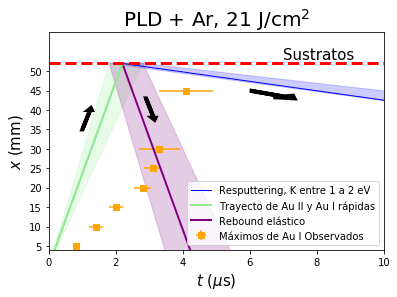

In [343]:
alt_Ar2 = np.array(pos_sputt_Ar_val_baj[16500:])
alt_Ar2[0:5000] = 52
plt.plot(tiemposMaxAr[3], pos_sputt_Ar_val, color='blue', linewidth=1, label='Resputtering, K entre 1 a 2 eV')
#plt.plot(tiemposMaxAr[3][16500:], pos_sputt_Ar_val_alt[16500:], color='black', linewidth=1, label='"Resputtering" con K=1.5eV')
#plt.plot(tiemposMaxAr[3][21500:], pos_sputt_Ar_val_baj[21500:], color='blue', linewidth=2, label='"Resputtering" con K=1.5eV')
plt.fill_between(tiemposMaxAr[3][16500:],pos_sputt_Ar_val_alt[16500:], alt_Ar2,color='blue', alpha=0.2)

alt_Ar = np.zeros(21500)
alt_Ar[:] = 52
alt_Ar[0:16500] = pos_rebound_Ar_val_alt[0:16500]
plt.plot(tiemposMaxAr[3][0:18500], pos_rebound_Ar_val[0:18500], color='lightgreen', linewidth=2, label='Trayecto de Au II y Au I rápidas')
plt.fill_between(tiemposMaxAr[3][0:21500], alt_Ar, pos_rebound_Ar_val_baj[0:21500],color='lightgreen', alpha=0.2)

alt_Ar1 = np.array(pos_rebound_Ar_val_baj[16500:])
alt_Ar1[0:5000] = 52
plt.plot(tiemposMaxAr[3][18500:], pos_rebound_Ar_val[18500:], color='purple', linewidth=2, label='Rebound elástico')
plt.fill_between(tiemposMaxAr[3][16500:], pos_rebound_Ar_val_alt[16500:], alt_Ar1,color='purple', alpha=0.2)

plt.errorbar(ob_val,x_v, xerr=ob_err, yerr=0.5, fmt='s', color= 'orange', ecolor='orange', label = 'Máximos de Au I Observados')
plt.arrow(1, 35, 0.23, 5, head_width=0.1, head_length=0.5, linewidth=4, color='black')
plt.arrow(2.9, 43, 0.23, -5,head_width=0.1, head_length=0.5, linewidth=4, color='black')
plt.arrow(6, 45, 1, -1.5,head_width=.7, head_length=.6, linewidth=4, color='black')
plt.legend(loc=4)
plt.xlabel('$t$ ($\mu$s)', fontsize=15)
plt.ylabel('$x$ (mm)', fontsize=15)
plt.xlim(0,10)
plt.ylim(4.0, 60)
plt.yticks([5,10,15,20,25,30,35,40,45,50])
plt.axhline(52, linestyle='--', color='red', linewidth=3)
plt.text(7,53, 'Sustratos', fontsize=15)
plt.title('PLD + Ar, $21$ J/cm$^2$', fontsize=20)

### 1.1) 21 J/cm$^2$, PLD+Ar+MS

Se usa la fuerte aproximación de que no ocurren colisiones del oro con el argon entre el blanco y los sustratos.